1) Considere o exercício do Spa discutido em aula (slide 43 da aula 6 - Filas).  
a) Considerando μ1 = μ2 = 1, simule o problema e plote o gráfico do número médio de
pessoas no sistema (L) pela taxa de chegada (λ).  
b) Fixando a taxa de chegada em λ = 0.8, simule o problema e plote o gráfico do número
médio de pessoas no sistema (L) e o tempo de espera (W) pelo tamanho permitido da fila de espera (E). Considere que segundo o enunciado original, a fila de espera do Spa tem tamanho 0, mas que agora é possível que haja pessoas no Spa aguardando serviço.

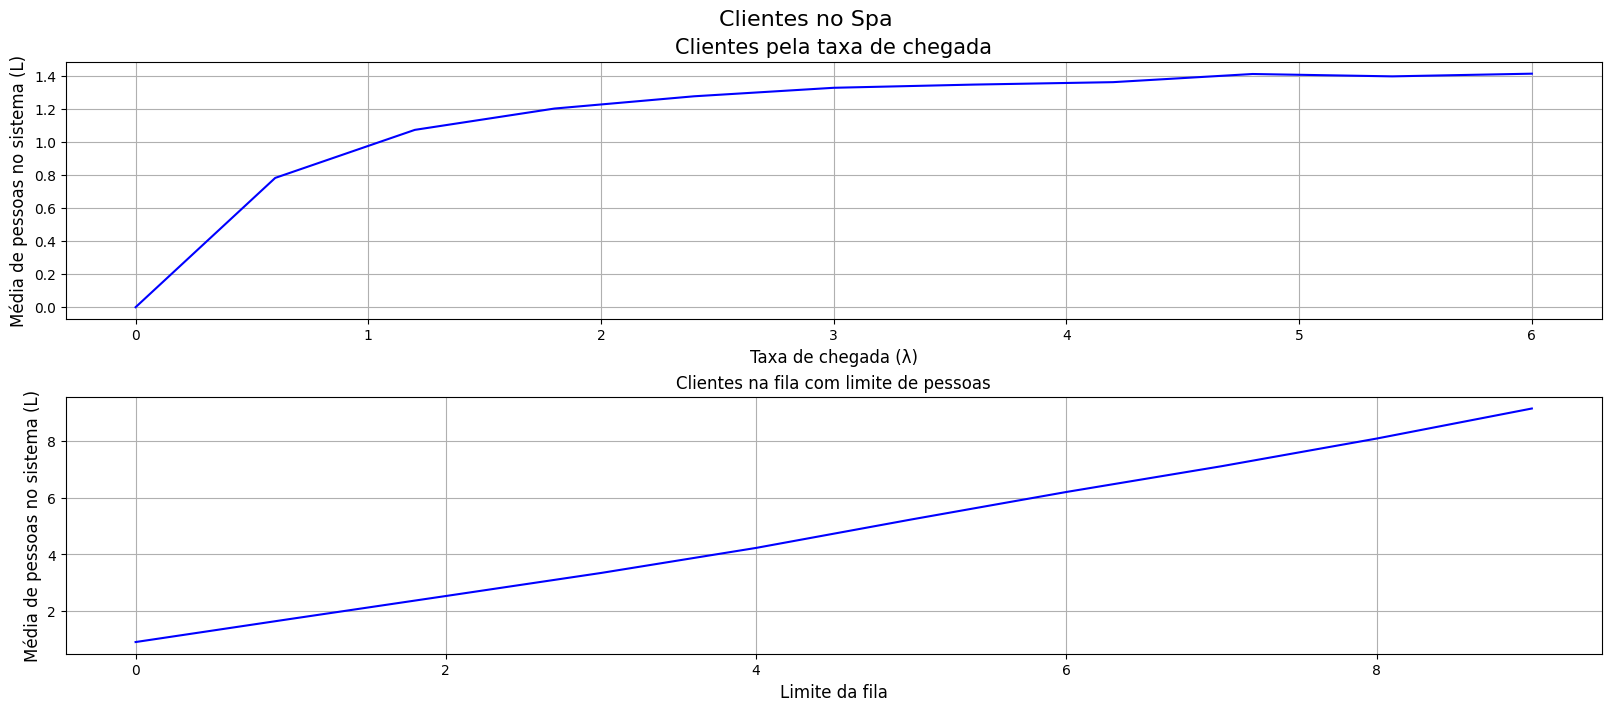

In [172]:
import matplotlib.pyplot as pyplot
import numpy

def p_lamb(lamb, mu):
    return lamb/(lamb + mu)

# Queue settings
lamb_b = 0.8
mu = 1
Tmax_a = 20000
Tmax_b = 20000

def letra_a(lamb, mu):
    left = 0
    right = 0
    L = 0

    for _ in range(Tmax_a):
        rand = numpy.random.random() * (lamb + mu + mu)

        if rand < lamb:
            left = 1
        elif rand >= lamb and rand < (lamb + mu):
            if left == 1 and right == 0:
                left = 0
                right = 1
            else:
                right = 0

        L += left + right

    return L / Tmax_a

def letra_b(lim, lamb, mu):
  left = 0
  right = 0
  queue = 0
  L = 0

  for _ in range(Tmax_b):
    rand = numpy.random.random() * (lamb + mu + mu)

    if rand < lamb:
      if left == 0:
        left = 1
      else:
        queue = min(queue + 1, lim)
    elif rand >= lamb and rand < (lamb + mu):
      if left == 1 and right == 0:
        left = 0
        right = 1

        if queue > 0:
          queue -= 1
          left = 1
    else:
      right = 0

    L += left + right + queue
  return L / Tmax_b


x_a = numpy.linspace(0, 6, 11)
vec = numpy.vectorize(letra_a)
y_a = vec(x_a, mu)

x_b = range(10)
vec = numpy.vectorize(letra_b)
y_b = vec(x_b, lamb_b, mu)


fig, axs = pyplot.subplots(2)

fig.suptitle('Clientes no Spa', fontsize=16)
fig.set_constrained_layout(True)
axs[0].set_title("Clientes pela taxa de chegada", fontsize=15)
axs[0].set_xlabel('Taxa de chegada (λ)', fontsize=12)
axs[0].set_ylabel('Média de pessoas no sistema (L)', fontsize=12)
axs[0].grid(True)
axs[0].plot(x_a, y_a, color='blue')

axs[1].set_title("Clientes na fila com limite de pessoas")
axs[1].set_xlabel('Limite da fila', fontsize=12)
axs[1].set_ylabel('Média de pessoas no sistema (L)', fontsize=12)
axs[1].grid(True)
axs[1].plot(x_b, y_b, color='blue')

pyplot.rcParams['figure.figsize'] = [16,7]
pyplot.show()

2) Considere uma fila de banco M/M/1 com taxa de chegada λ = 1 e taxa de serviço μ = 1.2. Considere ainda que cada cliente que chega tem uma probabilidade P de ser um cliente Preferencial, e que o cliente preferencial passa na frente de todos os clientes regulares.  
a) Simule e plote o gráfico do tempo médio de espera W por alguns valores de P (inclua P=0).  
b) Simule e plote um boxplot (também chamado de box & whisker plot) do tempo de espera por alguns valores de P (inclua P=0).

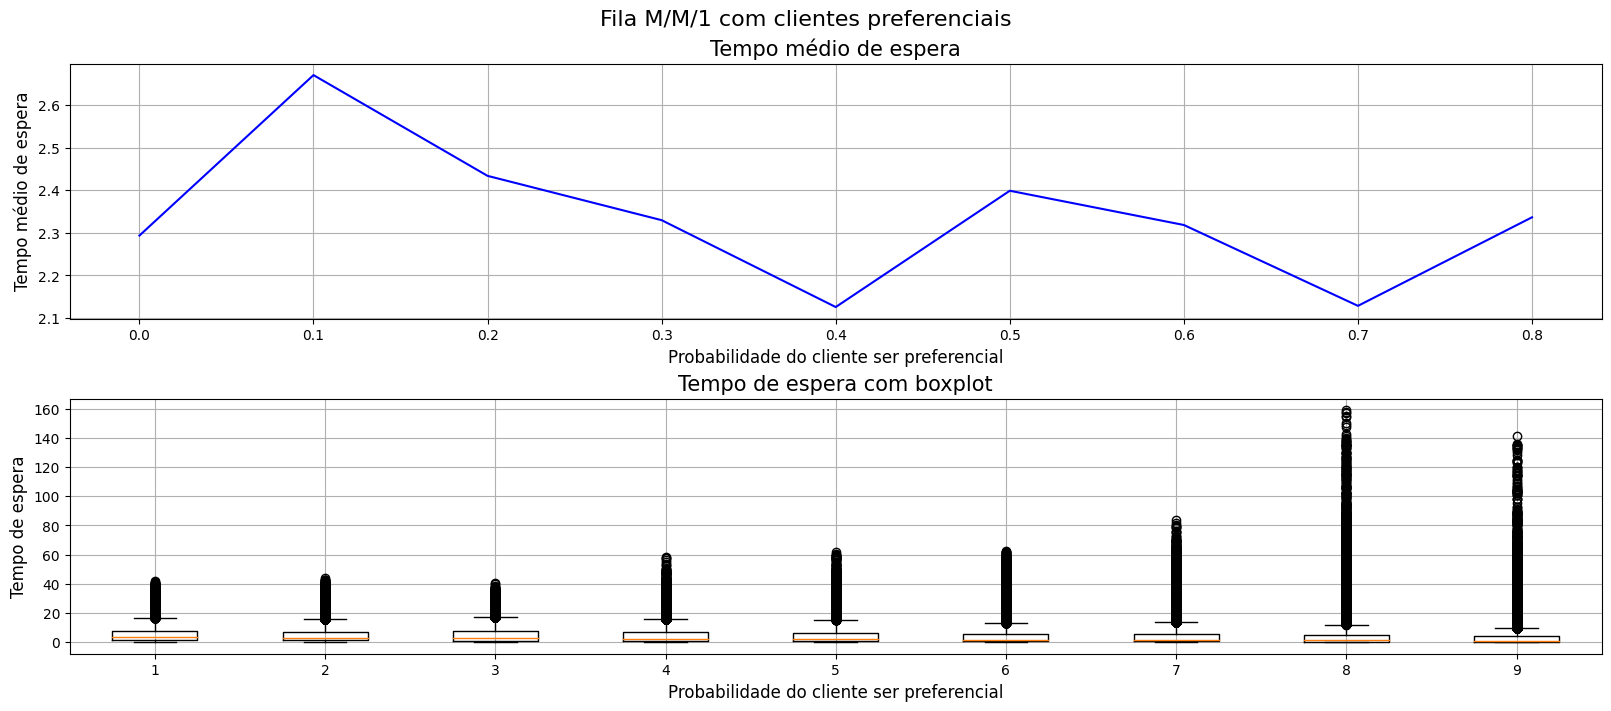

In [176]:
lamb2 = 1
mu = 1.2
max_clients = 100000

def letra_a(lamb, mu, p_preferencial):
    T = [0]
    duration = 0
    wait = 0

    for i in range(max_clients):
        if(i == 0):
            interval = numpy.random.exponential(1/lamb)
            duration += interval
            T.append(interval)
        else:
            interval = numpy.random.exponential(1/(lamb+mu))
            duration += interval
            if(numpy.random.random() < (lamb/(lamb+mu))):
                if(numpy.random.random() < p_preferencial):
                    T.insert(0, duration)
                else:
                    T.append(duration)
            else:
                if len(T) == 0:
                    continue
                time = T.pop(0)
                wait += (duration - time)

    return wait / max_clients

def letra_b(lamb, mu, p_preferencial):
    T = [0]
    duration = 0
    wait = 0
    times = []

    for i in range(max_clients):
        if(i == 0):
            interval = numpy.random.exponential(1/lamb)
            duration += interval
            T.append(interval)
        else:
            interval = numpy.random.exponential(1/(lamb+mu))
            duration += interval

            if(numpy.random.random() < (lamb/(lamb+mu))):
                if(numpy.random.random() < p_preferencial):
                    T.insert(0, duration)
                else:
                    T.append(duration)
            else:
                if len(T) == 0:
                    continue

                time = T.pop(0)
                delta = duration - time
                wait += delta
                times.append(delta)

    return times

p = []
mean_time = []
time = []
for P in numpy.arange(0.0, 0.9, 0.1):
    T = letra_a(lamb2, mu, P)
    mean_time.append(T)

    T = letra_b(lamb2, mu, P)
    time.append(T)

    p.append(P)

fig, axs = pyplot.subplots(2)
fig.suptitle('Fila M/M/1 com clientes preferenciais', fontsize=16)
fig.set_constrained_layout(True)
axs[0].set_title("Tempo médio de espera", fontsize=15)
axs[0].set_xlabel('Probabilidade do cliente ser preferencial', fontsize=12)
axs[0].set_ylabel('Tempo médio de espera', fontsize=12)
axs[0].grid(True)
axs[0].plot(p, mean_time, color='blue')

axs[1].set_title("Tempo de espera com boxplot", fontsize=15)
axs[1].set_xlabel('Probabilidade do cliente ser preferencial', fontsize=12)
axs[1].set_ylabel('Tempo de espera', fontsize=12)
axs[1].grid(True)
axs[1].boxplot(time)

pyplot.rcParams['figure.figsize'] = [16,7]
pyplot.show()

3) Compare o tempo de espera (W) de 2 filas M/M/1 independentes com taxa de chegada λ = 1 cada uma e de 1 fila única M/M/2 com taxa de chegada λ = 2. Calcule o tempo médio que um atendente fica ocioso em cada caso. Assuma a mesma taxa de serviço para todos os atendentes.

In [181]:
max_cliets = 10000000

def mm1(lamb, mu):
    queue_size = 0
    idle = 0

    for i in range(max_cliets):
        if (i == 0):
            queue_size += 1
        else:
            if (numpy.random.random() < (lamb/(lamb+mu))):
                queue_size += 1
            else:
                if queue_size == 0:
                    idle += 1
                    continue

                queue_size -= 1

    return idle / max_cliets


def mm2(lamb, mu):
    queue_size = 0
    idle = 0

    for i in range(max_cliets):
        if (i == 0):
            queue_size += 1
        else:
            if numpy.random.random() < (lamb/(lamb+mu+mu)):
                queue_size += 1
            else:
                if queue_size == 0:
                    idle += 1
                    continue

                queue_size -= 1

    return idle / max_cliets


print("Tempo ocioso em 2 filas M/M/1:", mm1(1, 1.2))
print("Tempo ocioso em 1 filas M/M/2:", mm2(2, 1.2))


Tempo ocioso em 2 filas M/M/1: 0.0904244
Tempo ocioso em 1 filas M/M/2: 0.0914052


4) Considere a rede de filas M/M/1 da figura abaixo, representando um trecho de avenidas de uma grande cidade, com cada fila representando um cruzamento congestionado. Considere os valores: λ1 = 10, λ2 = 14, μA = 15, μB = 30, μC = 24, μD = 20, μE = 6 (dados em veículos por minuto). A prefeitura deseja realizar obras para melhorar o fluxo de veículos em um dos 5 cruzamentos (isto é, aumentar a taxa de serviço), visando reduzir o tempo médio de espera (W) na rede. Mostre por simulação e discuta qual o cruzamento seria o melhor candidato para a melhoria.

In [182]:
max_carros = 100000

lamb1 = 10
lamb2 = 14

muA = 15
muB = 30
muC = 24
muD = 20
muE = 6

acc_lamb1 = lamb1
acc_lamb2 = lamb1 + lamb2
acc_muA = lamb1 + lamb2 + muA
acc_muB = lamb1 + lamb2 + muA + muB
acc_muC = lamb1 + lamb2 + muA + muB + muC
acc_muD = lamb1 + lamb2 + muA + muB + muC + muD

pAB = 0.25
pCB = 0.7
pDB = 0.3

cars_A = []
cars_B = []
cars_C = []
cars_D = []
cars_E = []

def letra_a():
  duration = 0

  for _ in range(max_carros):
    interval = numpy.random.exponential(1/(lamb1+lamb2+muA+muB+muC+muD+muE))
    rand = numpy.random.random() * (lamb1+lamb2+muA+muB+muC+muD+muE)
    duration += interval

    if rand < acc_lamb1:
      cars_A.append(duration)

    elif rand >= acc_lamb1 and rand < acc_lamb2:
      cars_C.append(duration)

    elif rand >= acc_lamb2 and rand < acc_muA:
      if len(cars_A) == 0:
        continue
      car = cars_A.pop(0)

      if np.random.random() < pAB:
        cars_B.append(car)
      else:
        cars_C.append(car)

    elif rand >= acc_muA and rand < acc_muB:
      if len(cars_B) == 0:
        continue

      car = cars_B.pop(0)
      cars_D.append(car)

    elif rand >= acc_muB and rand < acc_muC:
      if len(cars_C) == 0:
        continue
      car = cars_C.pop(0)

      if np.random.random() < pCB:
        cars_B.append(car)
      else:
        cars_E.append(car)

    elif rand >= acc_muC and rand < acc_muD:
      if len(cars_D) == 0:
        continue
      car = cars_D.pop(0)

      if np.random.random() < pDB:
        cars_B.append(car)

    elif rand >= acc_muD:
      if len(cars_E) == 0:
        continue
      car = cars_E.pop(0)

  print("Carros no cruzamento A:" , len(cars_A))
  print("Carros no cruzamento B:" , len(cars_B))
  print("Carros no cruzamento C:" , len(cars_C))
  print("Carros no cruzamento D:" , len(cars_D))
  print("Carros no cruzamento E:" , len(cars_E))
  print("Resposta: D")

letra_a()

Carros no cruzamento A: 2
Carros no cruzamento B: 3
Carros no cruzamento C: 17
Carros no cruzamento D: 3051
Carros no cruzamento E: 425
Resposta: D
